# Ответы на задания к семинару №1

## Задание №1

Найти длину текста в токенах, типах и леммах (после удаления пунктуации)

In [1]:
with open('../data/captain_daughter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
    
punct = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’'

clean_words = [w.strip(punct).lower() for w in text.split()]
clean_words = [w for w in clean_words if w!= '']
print(clean_words[:10])

['рвб', 'xviii', 'в', 'xix', 'в', 'xx', 'в', 'а', 'с', 'пушкин']


### Длина в токенах

In [2]:
# самая простая токенизация — разбиение по пробелам
len(clean_words)

32929

In [3]:
# посложнее
from nltk.tokenize import ToktokTokenizer

tknzr = ToktokTokenizer()
tokens = tknzr.tokenize(' '.join(clean_words))
len(tokens)

32935

In [4]:
# чем отличается?

print((set(clean_words) - set(tokens))) # есть в первом, нет во втором
print((set(tokens) - set(clean_words))) # есть во втором, нет в первом

{'2000—2017', '401—411', '1959—1962'}
{'1962', '1959', '411', '—', '2000', '2017'}


### Длина в типах

In [5]:
len(set(clean_words))

9371

### Длина в леммах (уникальных)

In [6]:
from pymystem3 import Mystem

m = Mystem(entire_input=False)
lemmas = m.lemmatize(' '.join(clean_words))
len(set(lemmas))

5019

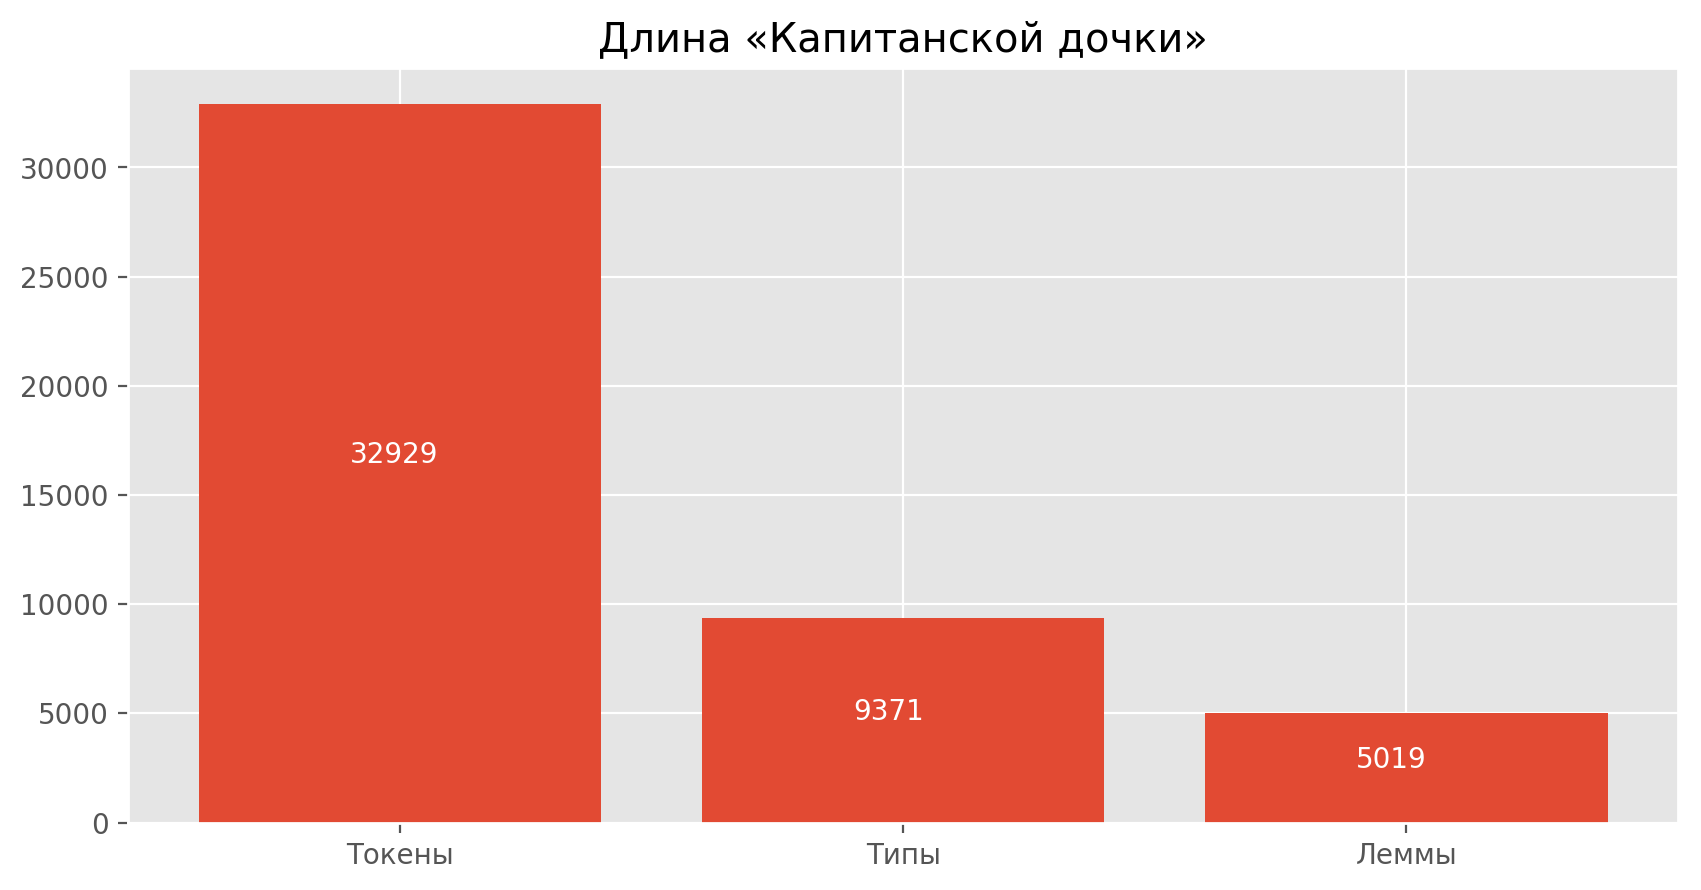

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

length = [len(clean_words), len(set(clean_words)), len(set(lemmas))]
x_axis = range(3)
labels = ['Токены', 'Типы', 'Леммы']

plt.figure(figsize=(10,5), dpi=200)
plt.bar(x_axis, length)
plt.title('Длина «Капитанской дочки»')
plt.xticks(x_axis, labels)

for x, y in zip(x_axis, length):
    plt.text(x-0.1, y/2, str(y), color='w')
        
plt.show()


## Задание №2

Проверить, соблюдается ли закон Ципфа и построить диаграмму с 20 самыми частотными леммами (до и после удаления стоп-слов).

### До удаления стоп-слов

In [9]:
from collections import Counter

counts = Counter(lemmas)
counts.most_common(20)

[('я', 1478),
 ('и', 1307),
 ('в', 771),
 ('он', 637),
 ('не', 634),
 ('что', 507),
 ('быть', 506),
 ('на', 477),
 ('с', 458),
 ('ты', 349),
 ('мой', 337),
 ('она', 286),
 ('мы', 255),
 ('сказать', 253),
 ('к', 240),
 ('а', 236),
 ('за', 203),
 ('свой', 194),
 ('как', 186),
 ('то', 184)]

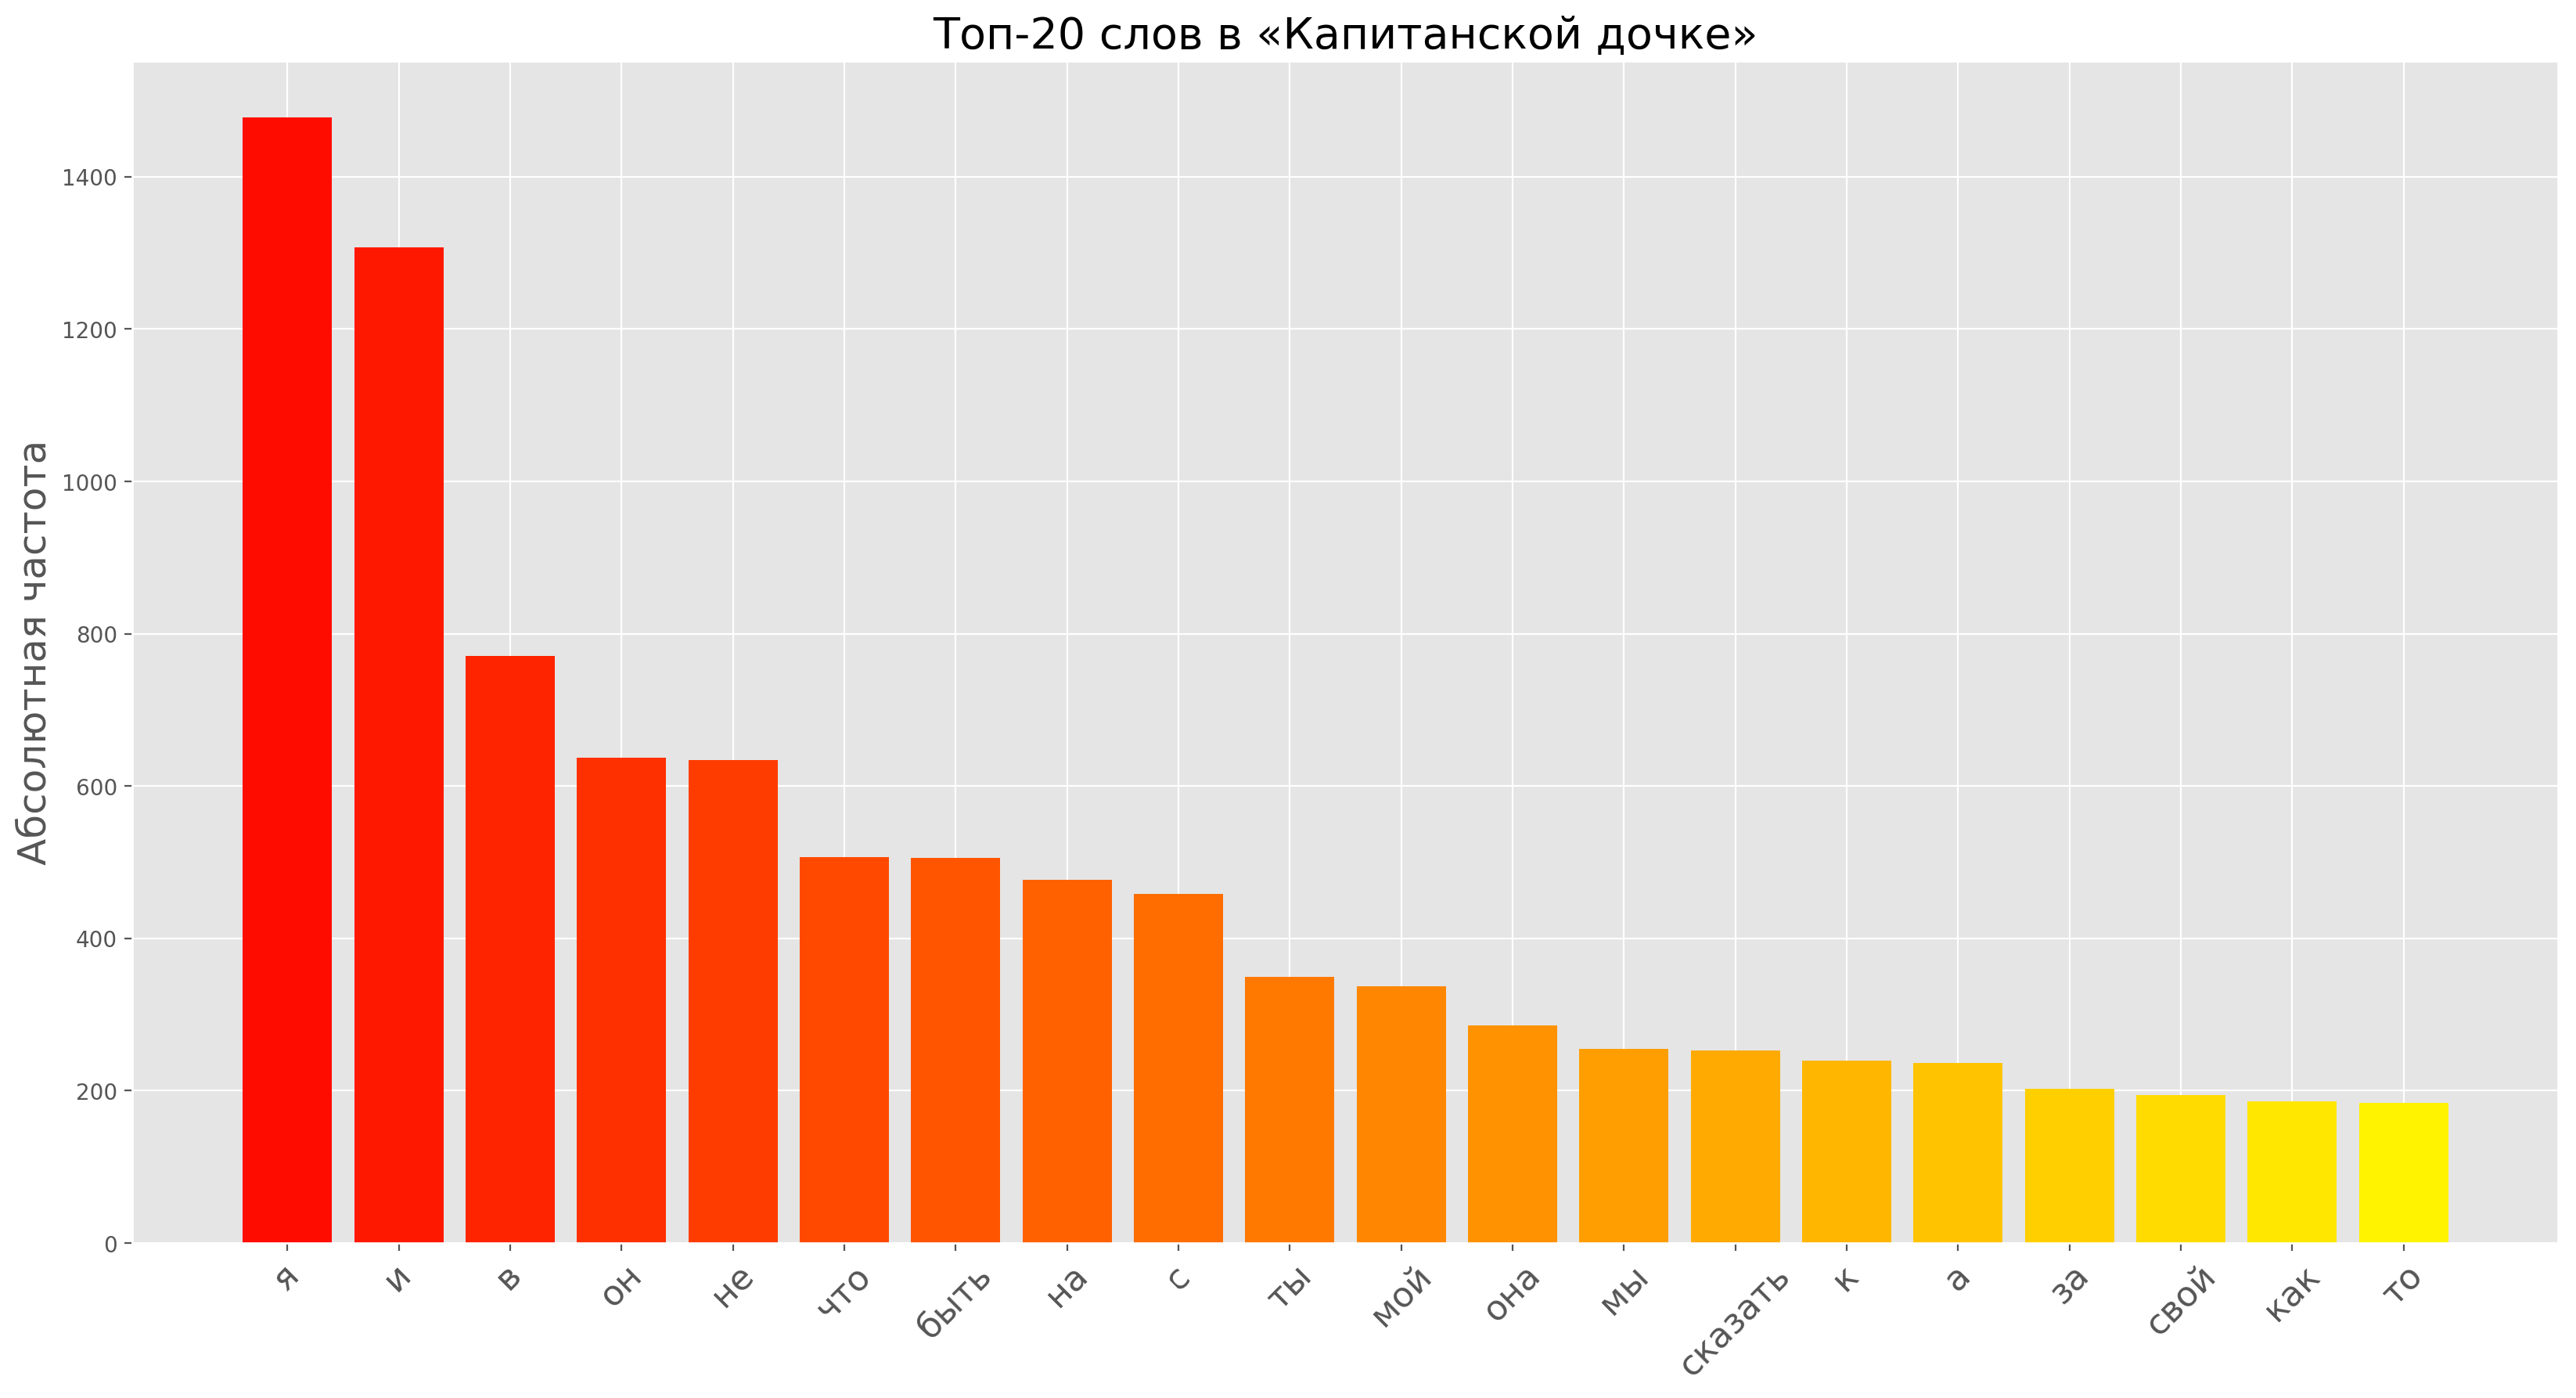

In [18]:
X = range(20)
Y = [el[1] for el in counts.most_common(20)]
labels = [el[0] for el in counts.most_common(20)]

colors = sns.color_palette('autumn', 20)

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(X, Y, color=colors)
plt.title('Топ-20 слов в «Капитанской дочке»',  fontsize=20)
plt.ylabel('Абсолютная частота',  fontsize=18)
plt.xticks(X, labels, rotation=45, fontsize=16)
plt.show()

### После удаления стоп-слов

In [11]:
with open('../data/rus_stopwords.txt', 'r', encoding='utf-8') as f:
    sw = f.read().split('\n')

sw[:10]

['а', 'ах', 'б', 'без', 'безо', 'будем', 'будет', 'будете', 'будешь', 'буду']

Как изменилось количество токенов, типов и лемм после удаления стоп-слов?

In [12]:
no_stops = [w for w in clean_words if w not in sw]
no_stops_lemmas = [w for w in lemmas if w not in sw]

# количество токенов без стоп-слов
print(len(no_stops))

# количество типов без стоп-слов
print(len(set(no_stops)))

# количество уникальных лемм без стоп-слов
print(len(set(no_stops_lemmas)))

18340
9058
4887


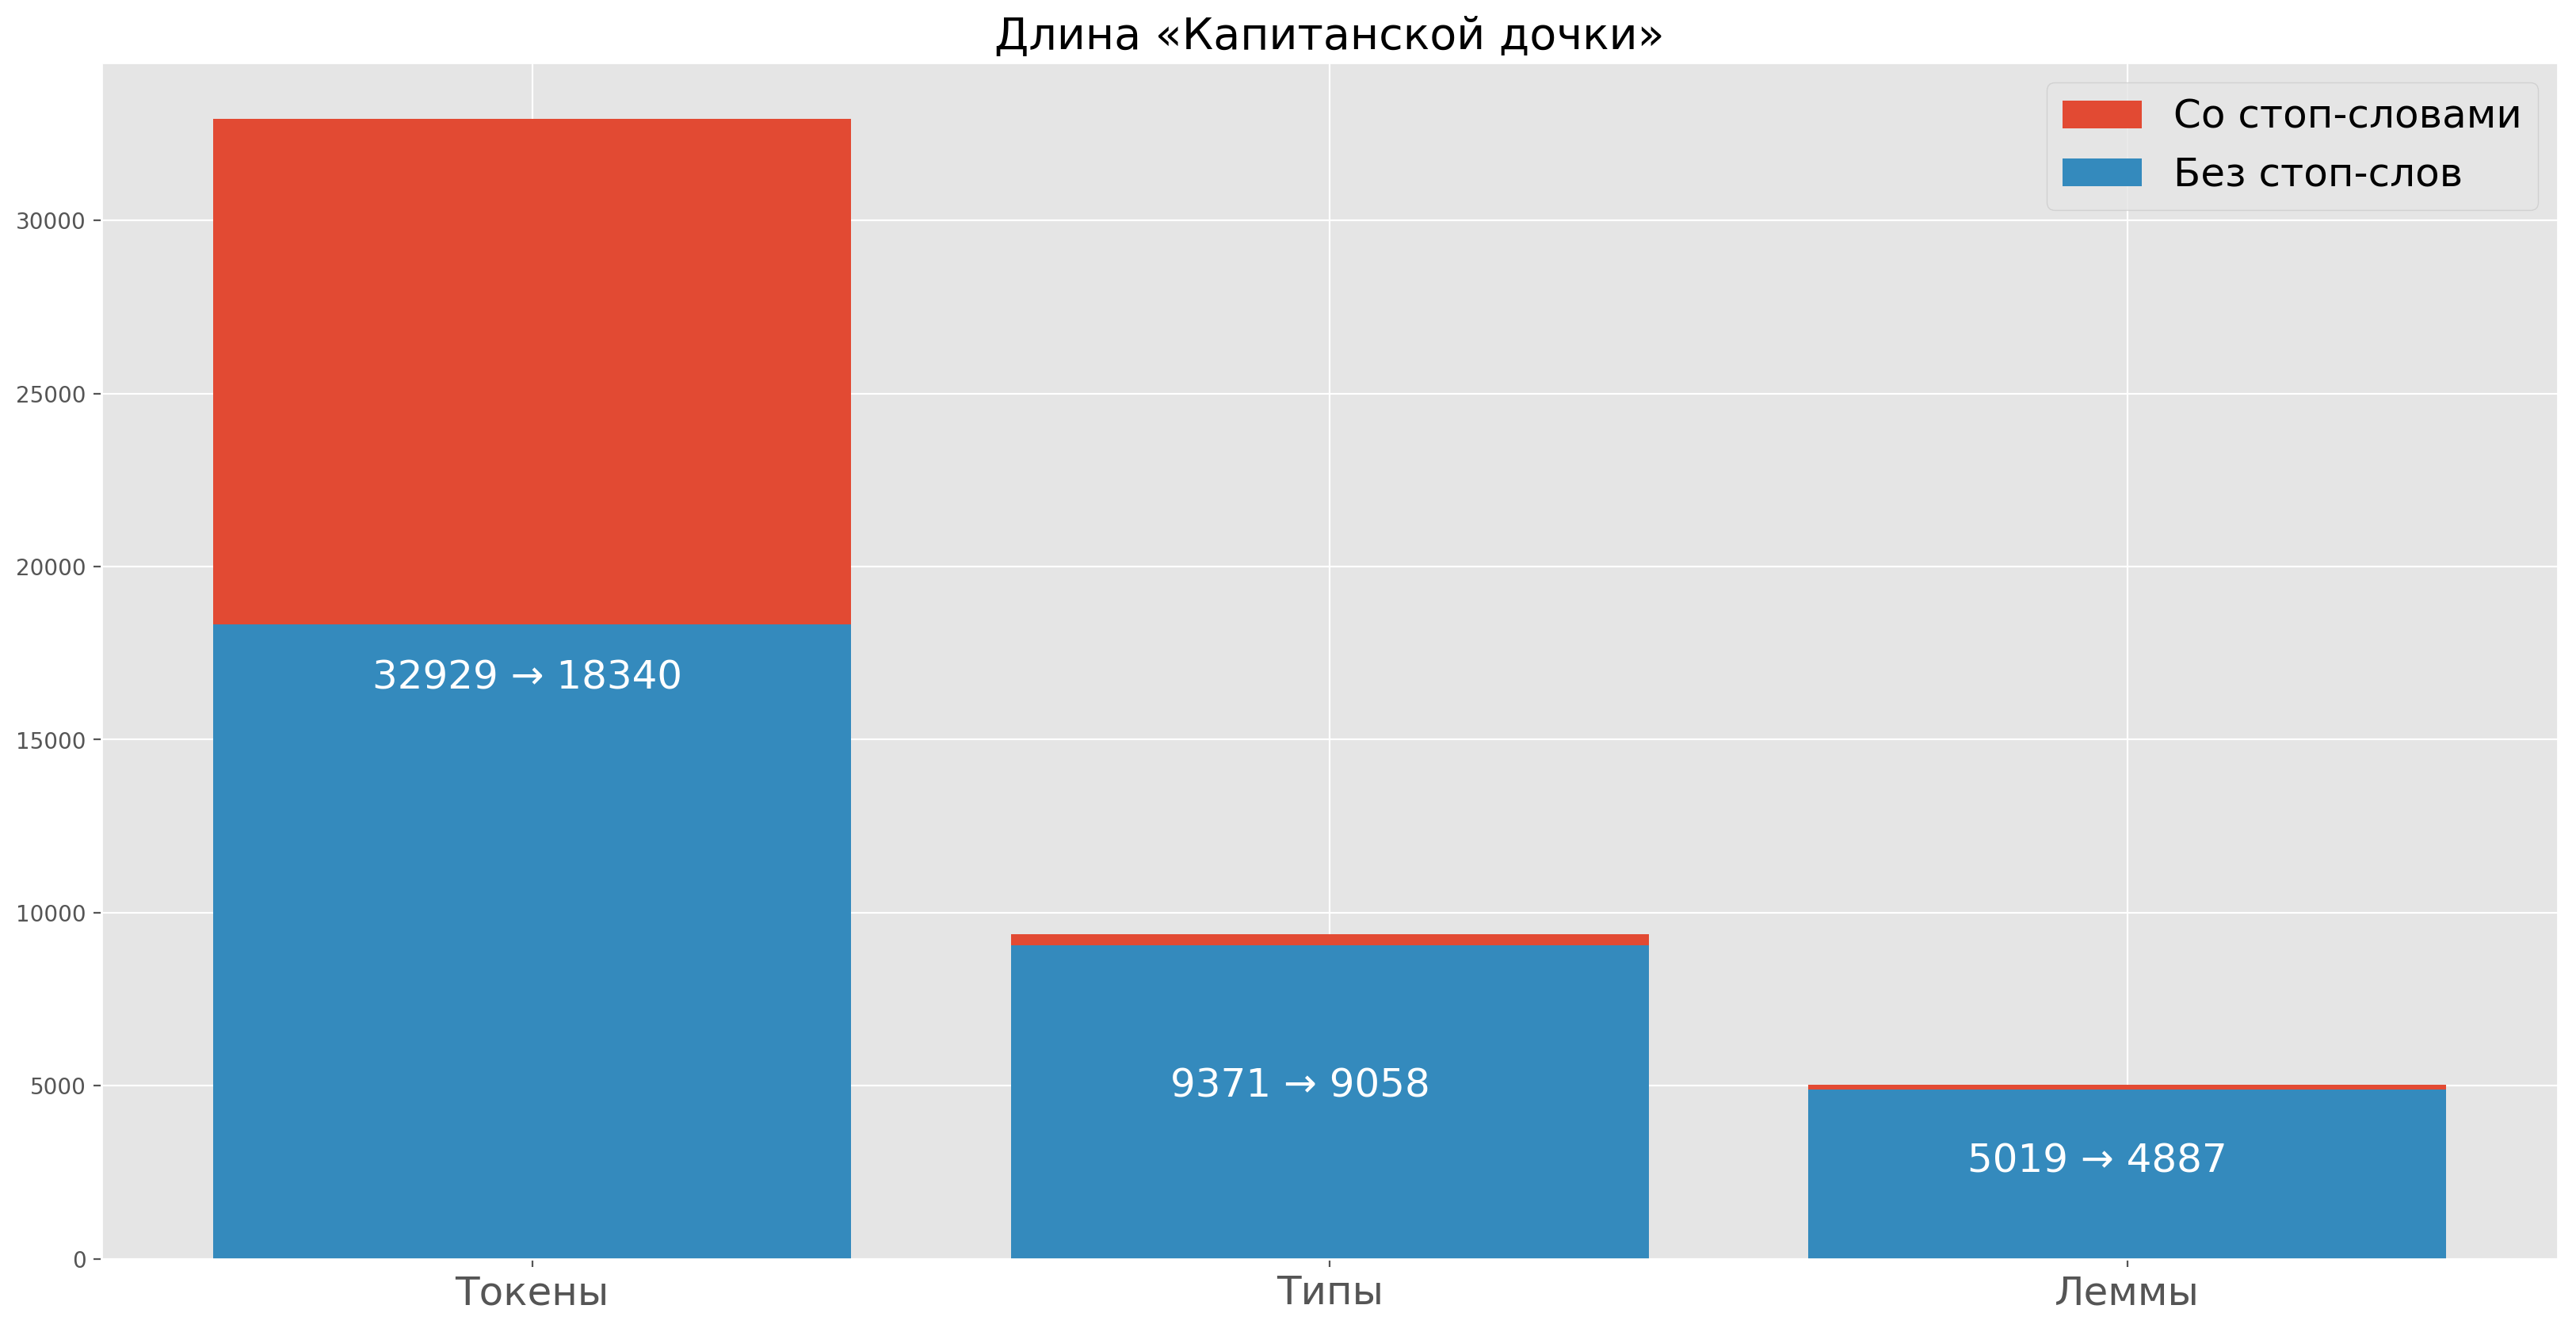

In [13]:
X = range(3)
Y1 = length
Y2 = [18340, 9058, 4887]
labels = ['Токены', 'Типы', 'Леммы']

plt.figure(figsize=(20, 10), dpi=200)
with_stops = plt.bar(X, Y1)
without = plt.bar(X, Y2)
plt.title('Длина «Капитанской дочки»', fontsize=20)
plt.xticks(X, labels, fontsize=18)
plt.legend((with_stops[0], without[0]), ('Со стоп-словами', 'Без стоп-слов'), fontsize=18)

for x, y, z in zip(X, Y1, Y2):
    plt.text(x-0.2, y/2, '%s → %s' % (y, z), color='w', fontsize=18)

plt.show()

In [14]:
no_stops_counts = Counter(no_stops)
no_stops_counts.most_common(20)

[('пугачев', 89),
 ('марья', 85),
 ('ивановна', 85),
 ('батюшка', 73),
 ('савельич', 68),
 ('швабрин', 67),
 ('иван', 62),
 ('петр', 55),
 ('крепости', 55),
 ('андреич', 49),
 ('бог', 46),
 ('минуту', 43),
 ('кузмич', 40),
 ('матушка', 37),
 ('пугачева', 37),
 ('крепость', 35),
 ('комендант', 35),
 ('дело', 34),
 ('егоровна', 32),
 ('время', 31)]

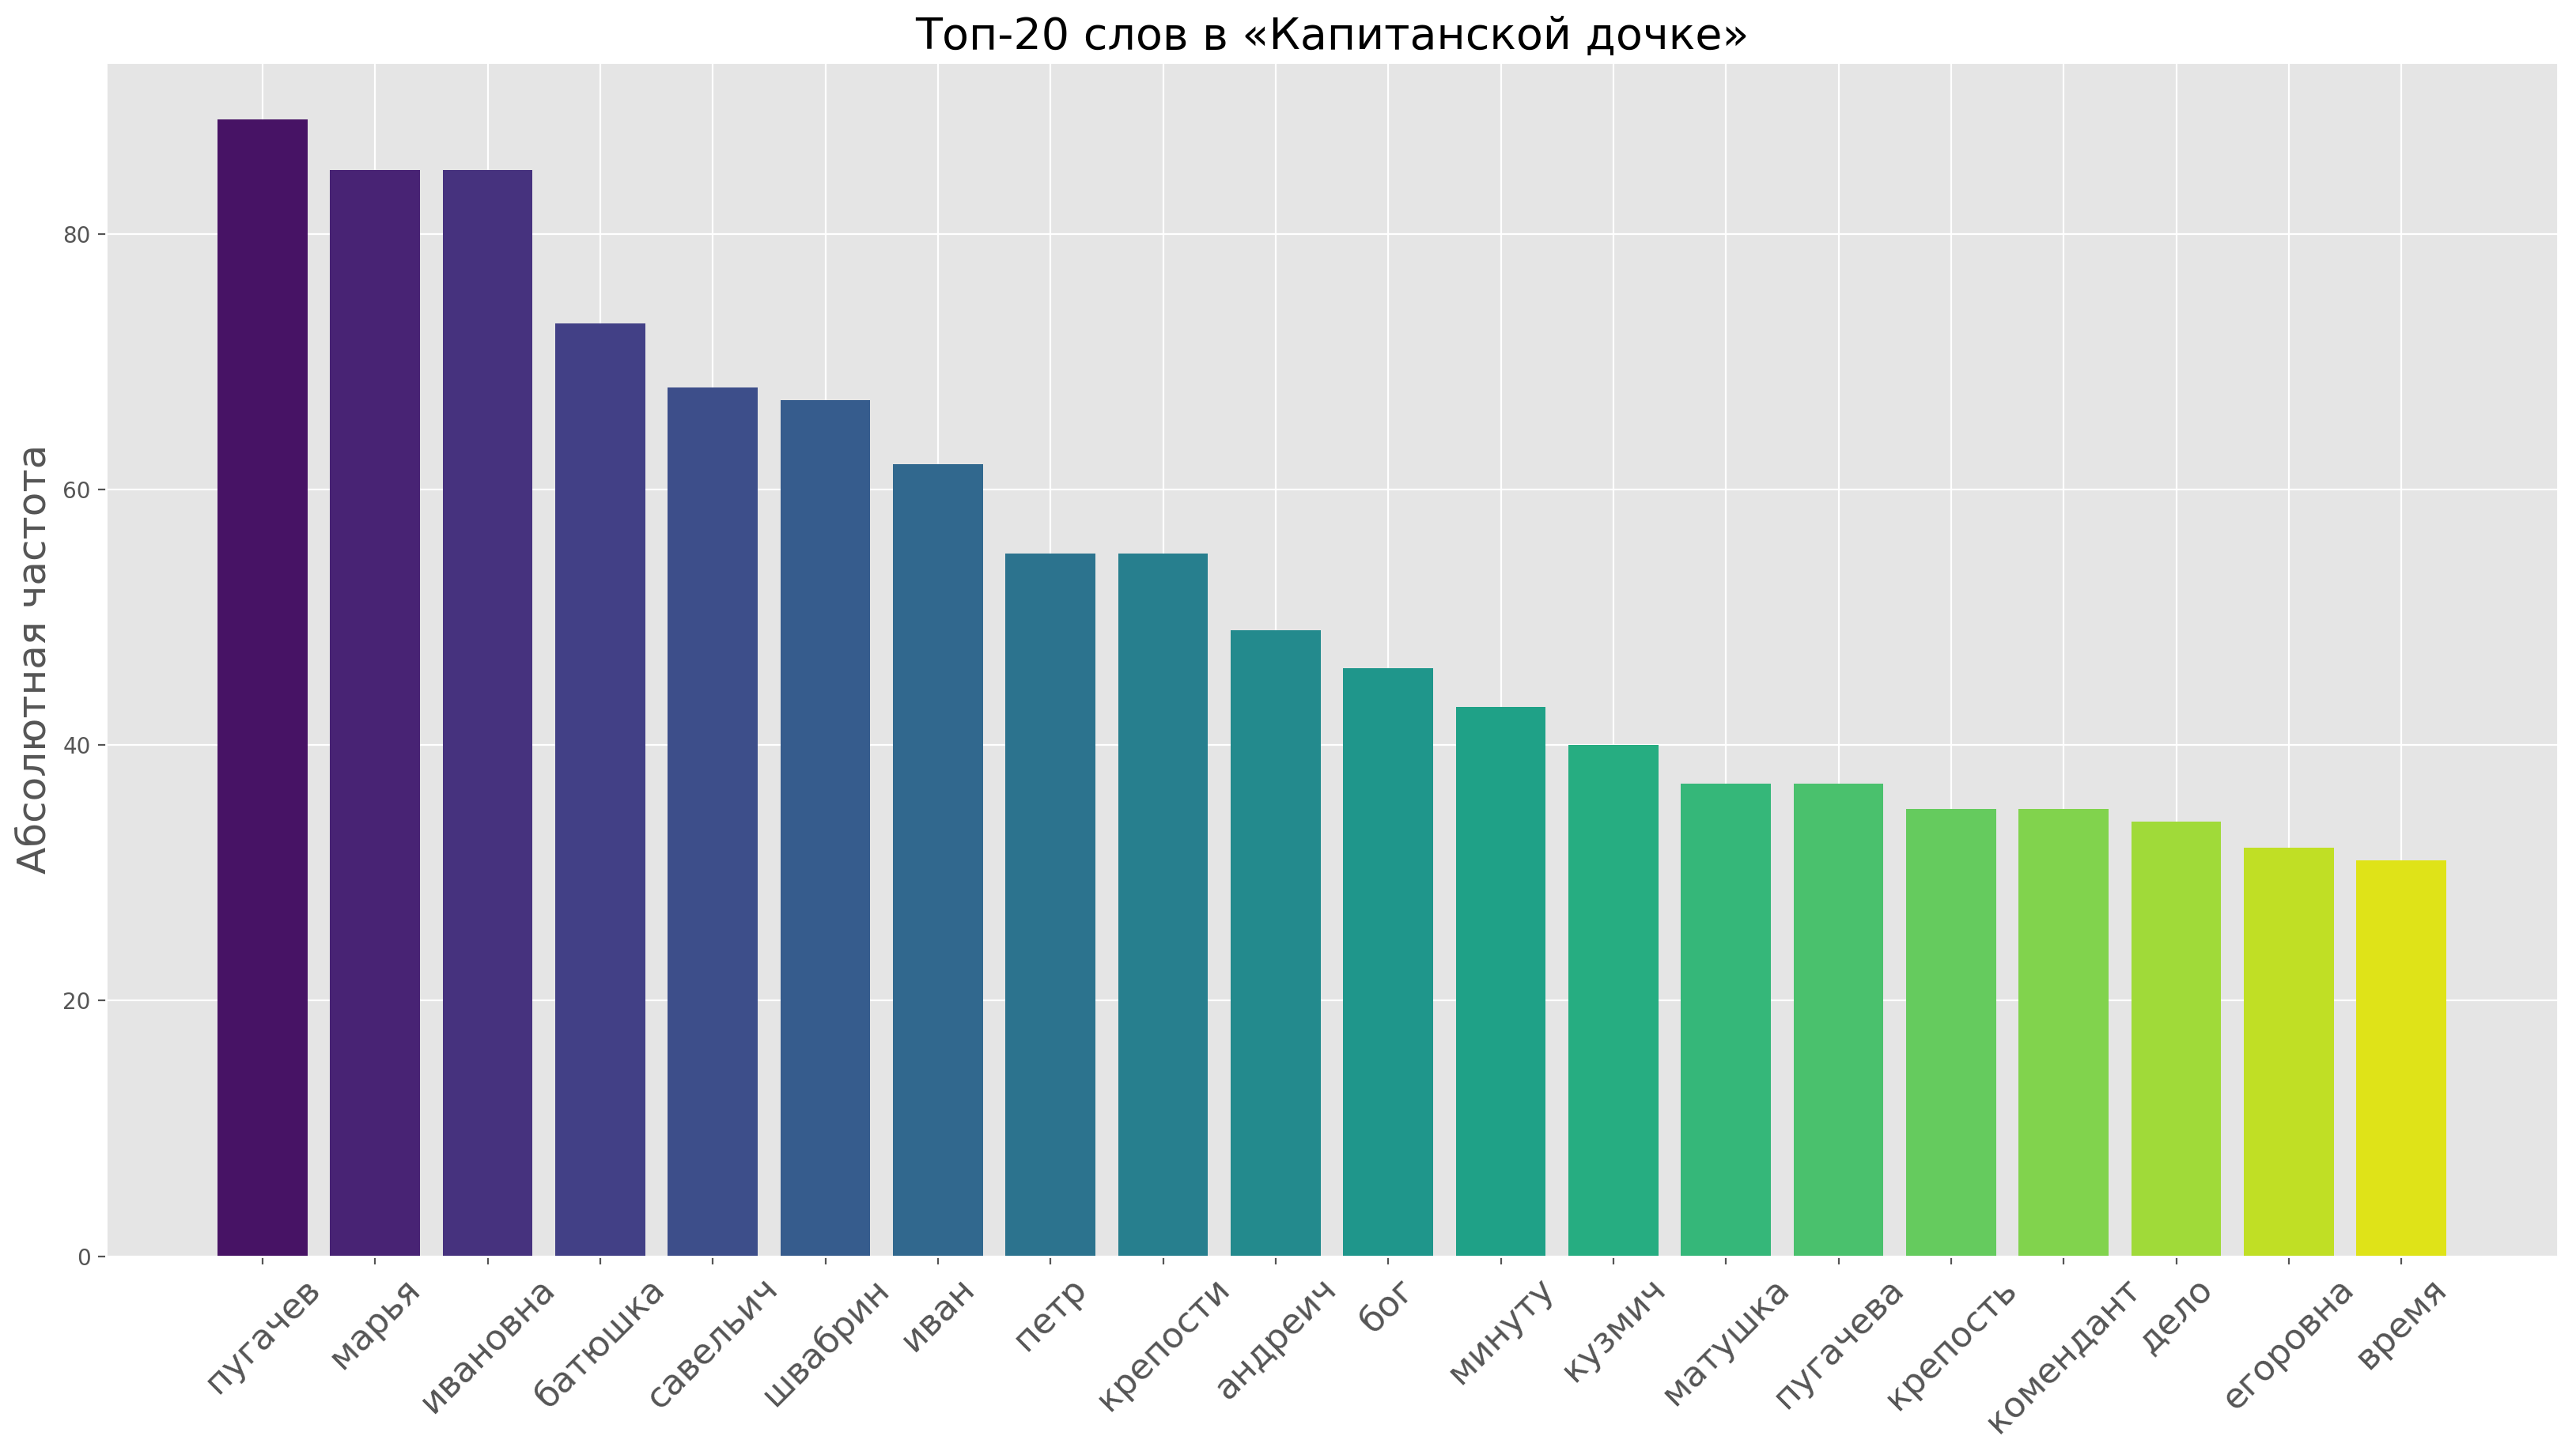

In [19]:
X = range(20)
Y = [el[1] for el in no_stops_counts.most_common(20)]
labels = [el[0] for el in no_stops_counts.most_common(20)]

colors = sns.color_palette('viridis', 20)

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(X, Y, color=colors)
plt.title('Топ-20 слов в «Капитанской дочке»',  fontsize=20)
plt.ylabel('Абсолютная частота',  fontsize=18)
plt.xticks(X, labels, rotation=45, fontsize=16)
plt.show()

### Лирическое отступление: облака слов

Красивая и наглядная визуализация частотных слов в текстах, которую можно сделать с помощью библиотеки `wordcloud` (вот [документация](https://amueller.github.io/word_cloud/auto_examples/index.html)).

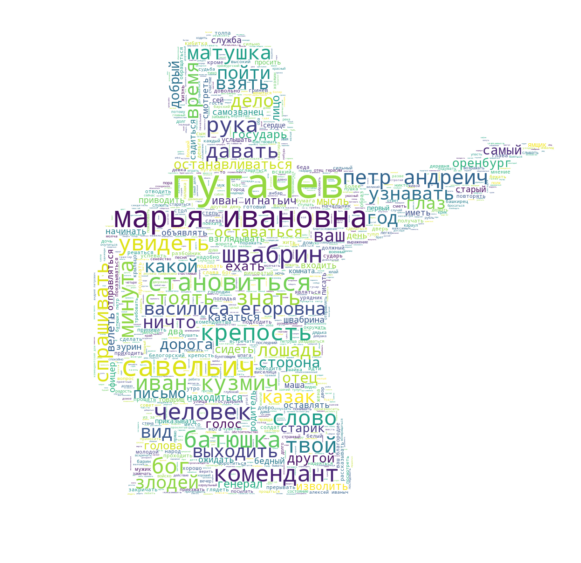

In [35]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
mask = np.array(Image.open("../img/pushkin.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=mask)

# генерируем
cloud.generate(' '.join(no_stops_lemmas))

# визуализируем
plt.figure(figsize=(3,5), dpi=200)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# сохраняем
cloud.to_file("../img/pushkin_cloud.png")

### Закон Ципфа

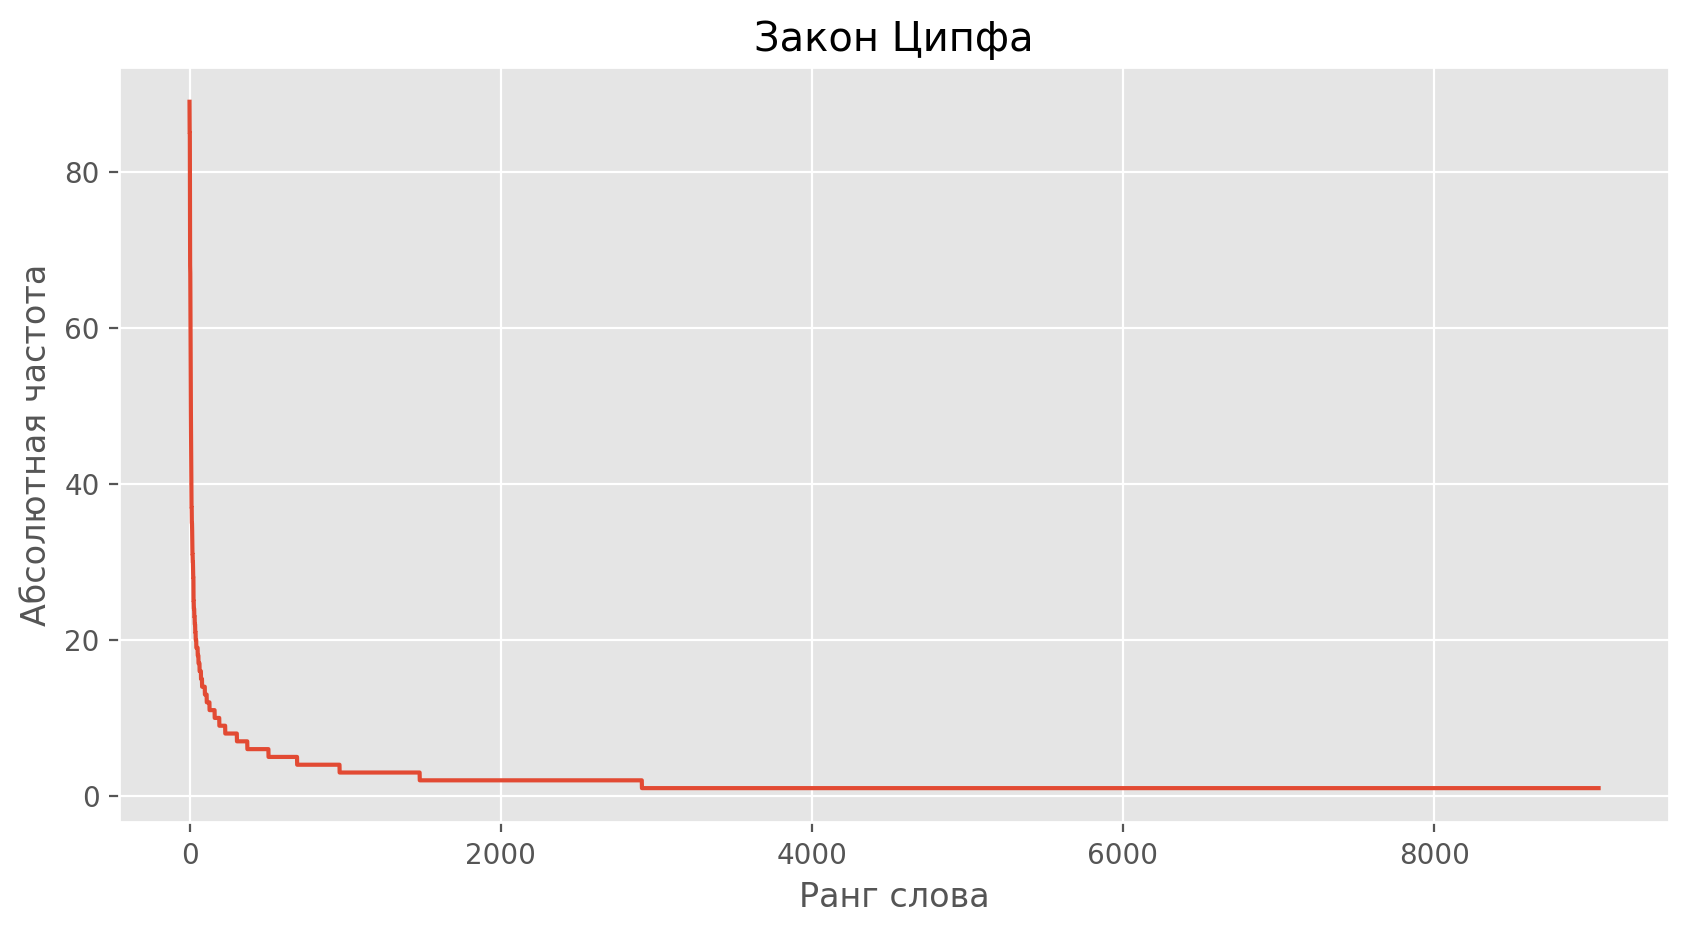

In [20]:
X = range(len(no_stops_counts))
Y = [el[1] for el in no_stops_counts.most_common()]

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(X, Y)
plt.title('Закон Ципфа')
plt.ylabel('Абсолютная частота')
plt.xlabel('Ранг слова')
plt.show()

### Как еще можно отсортировать словарь?

In [21]:
my_zoo = {'tigers': 10, 'crocodiles': 2, 'elephants': 1, 'monkeys': 6, 'me': 1}
sorted_zoo = sorted(my_zoo.items(), key=lambda x: x[1], reverse=True)
print(sorted_zoo)

[('tigers', 10), ('monkeys', 6), ('crocodiles', 2), ('elephants', 1), ('me', 1)]


## Задание №3 

Найти среднюю длину предложения.
Возвращаемся к исходному тексту, до удаления пунктуации.

In [22]:
from rusenttokenize import ru_sent_tokenize
sents = ru_sent_tokenize(text)

# в символах
char_len = sum([len(sent) for sent in sents])/len(sents) # почему не len(text)/len(sents)?
print('%.1f' % char_len)

# в словах
word_len = len(text.split())/len(sents)
print('%.1f' % word_len)

67.3
10.9


## Задание №4

Найти самую частотную часть речи (до и после удаления стоп-слов).

### До удаления стоп-слов

In [23]:
def count_pos(text):
    parsed = m.analyze(text)
    tags = []
    for word in parsed:
        try:
            gr = word['analysis'][0]['gr']
            pos = gr.split('=')[0].split(',')[0]
            tags.append(pos)
        except (KeyError, IndexError) as e:
            continue
    pos_counts = Counter(tags)
    tagset = set(tags)
    return pos_counts, tagset

In [24]:
pos_counts, tagset = count_pos(' '.join(clean_words))
pos_counts.most_common(5)

[('S', 8631), ('V', 6834), ('SPRO', 3855), ('PR', 3471), ('CONJ', 2810)]

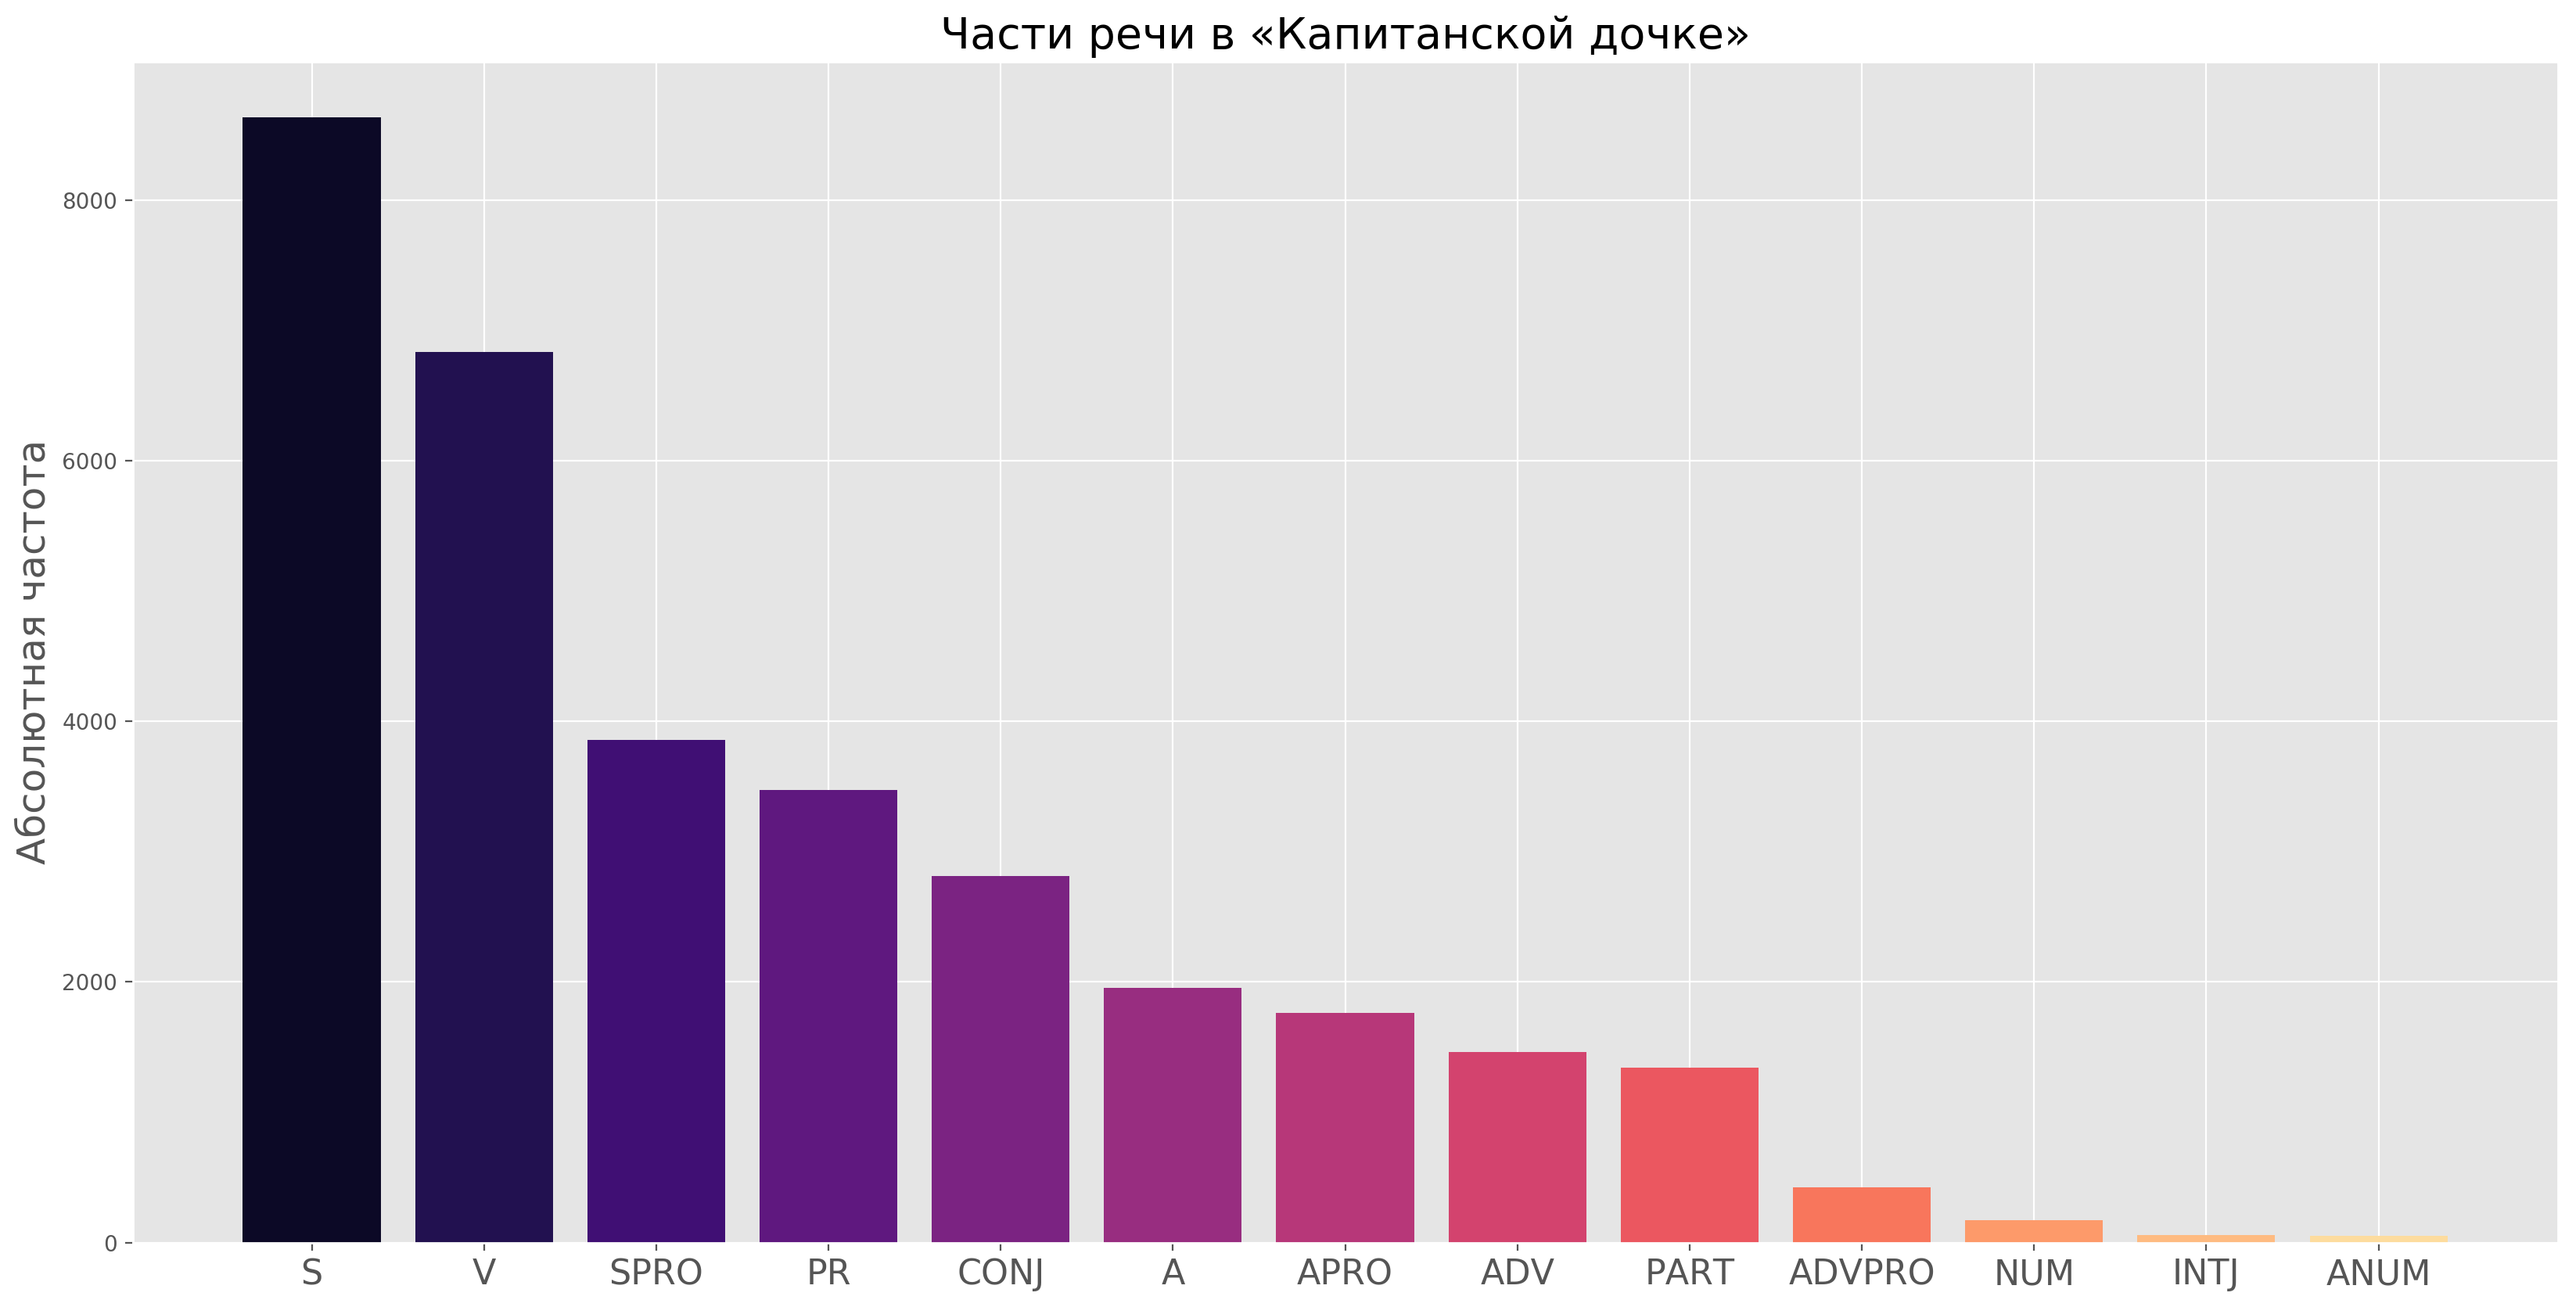

In [25]:
X = range(len(tagset))
Y = [el[1] for el in pos_counts.most_common()]
labels = [el[0] for el in pos_counts.most_common()]

colors = sns.color_palette('magma', len(tagset))

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(X, Y, color=colors)
plt.title('Части речи в «Капитанской дочке»',  fontsize=20)
plt.ylabel('Абсолютная частота',  fontsize=18)
plt.xticks(X, labels, fontsize=16)
plt.show()

### После удаления стоп-слов

In [26]:
pos_counts, tagset = count_pos(' '.join(no_stops))
pos_counts.most_common(5)

[('S', 8614), ('V', 5614), ('A', 1955), ('ADV', 1075), ('APRO', 323)]

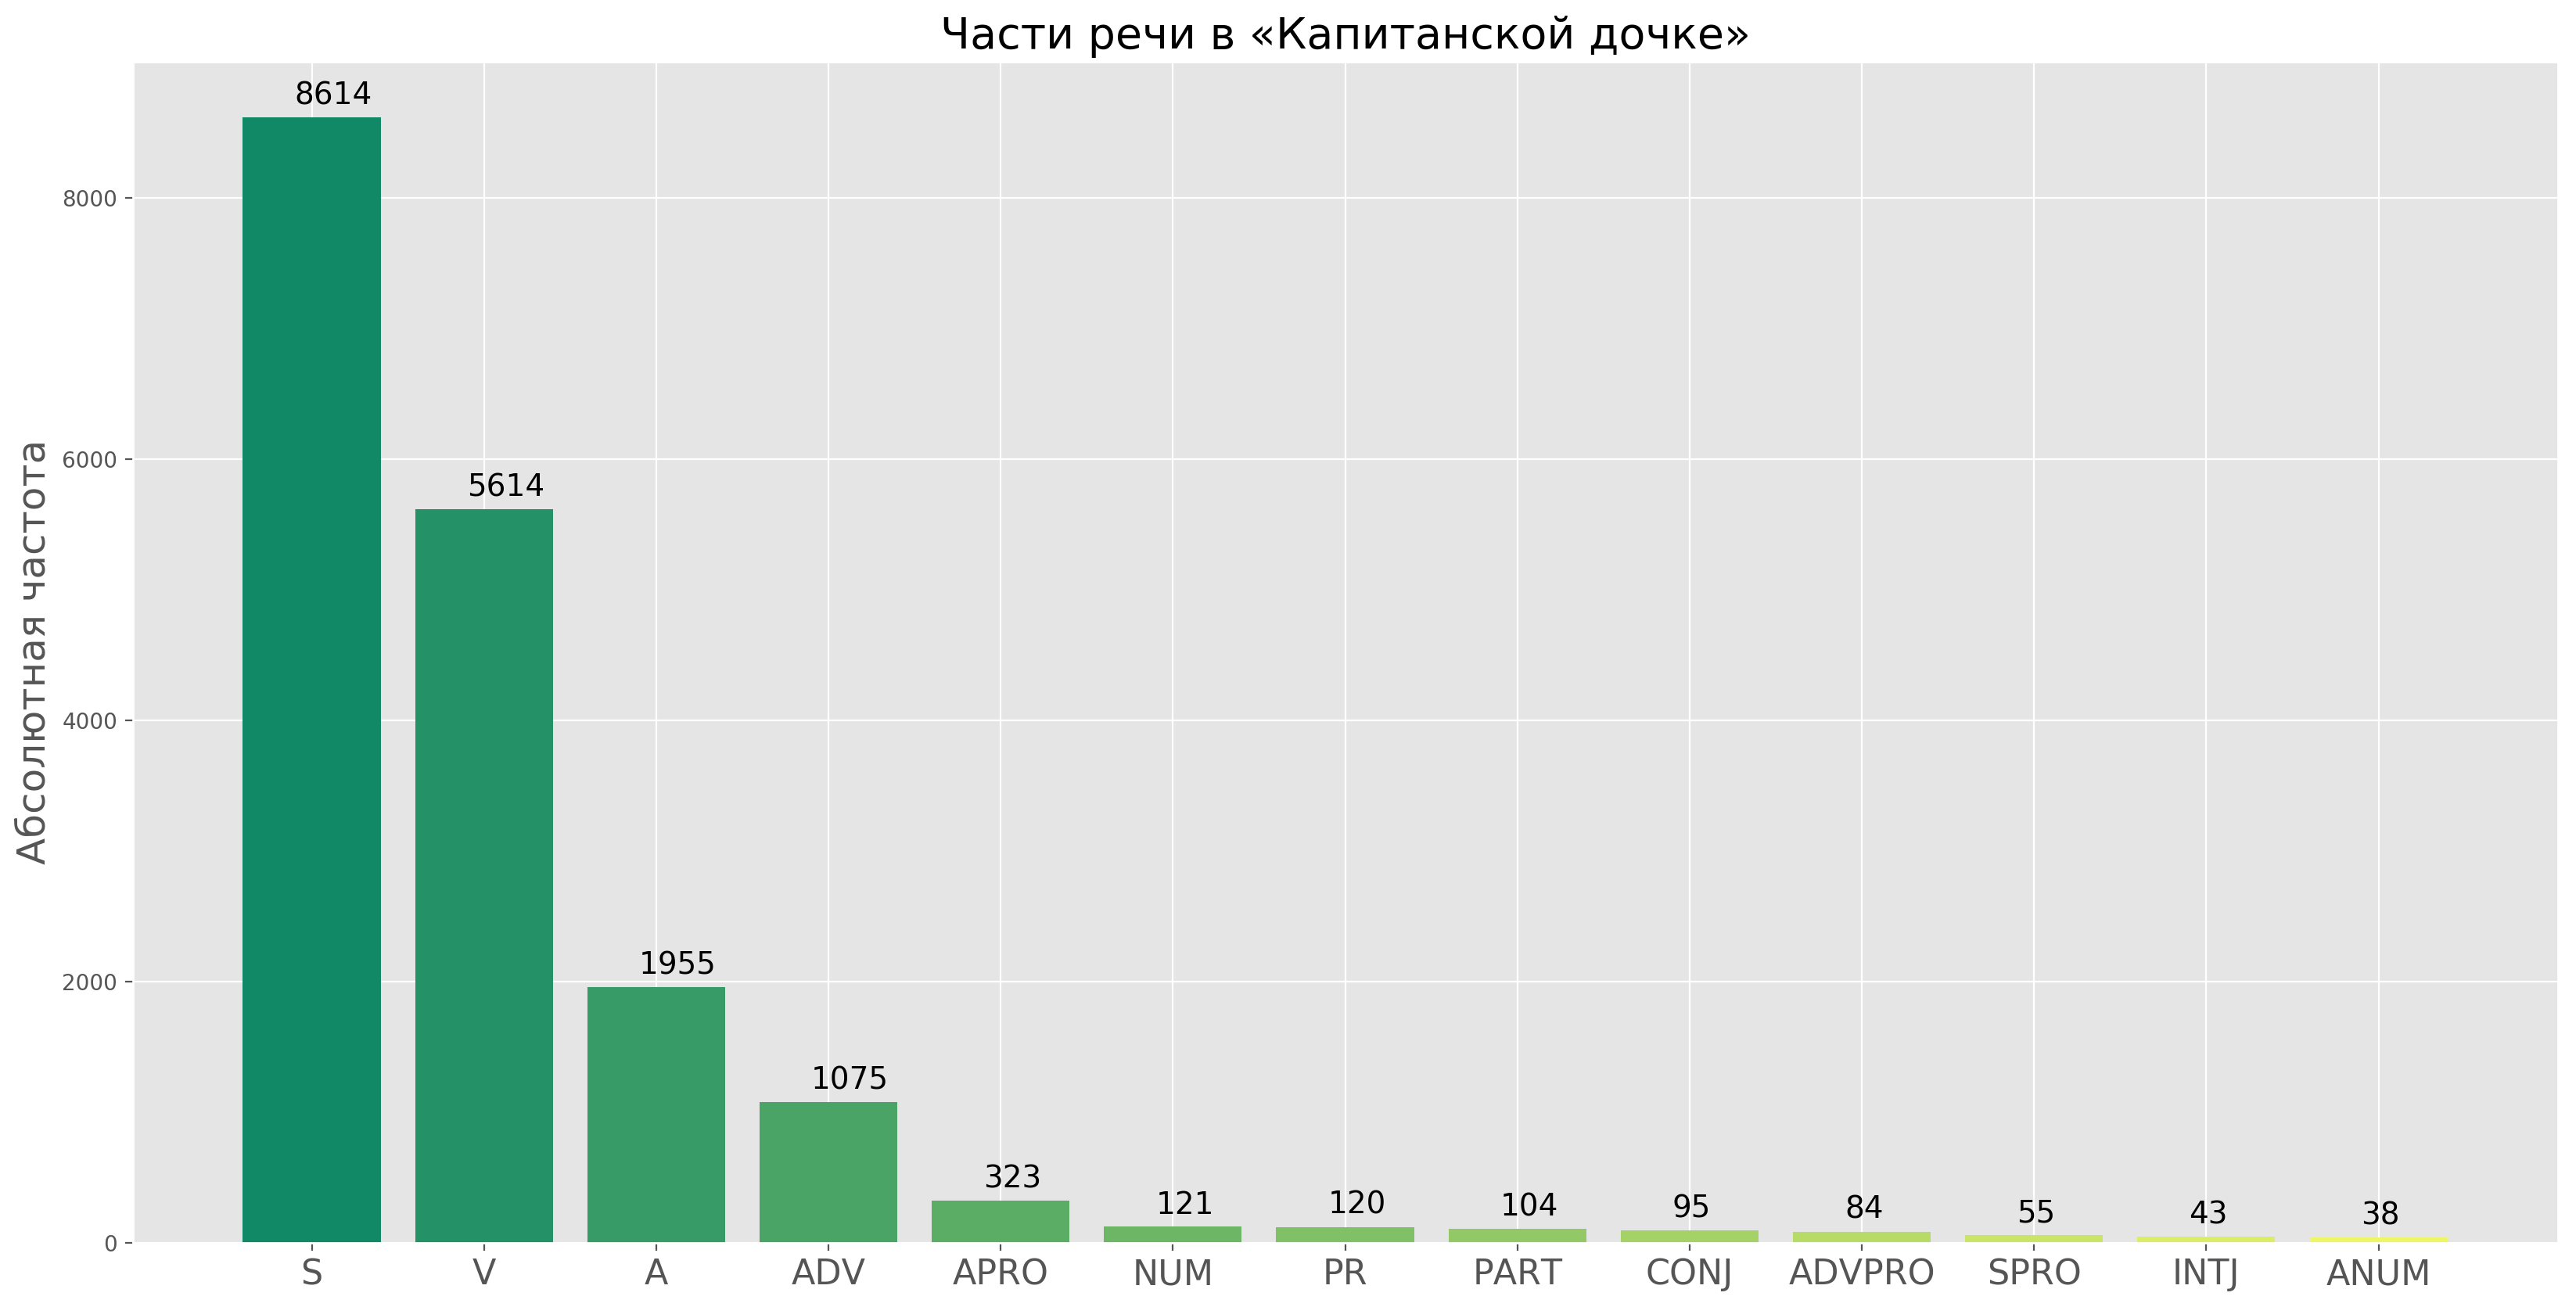

In [27]:
X = range(len(tagset))
Y = [el[1] for el in pos_counts.most_common()]
labels = [el[0] for el in pos_counts.most_common()]

colors = sns.color_palette('summer', len(tagset))

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(X, Y, color=colors)
plt.title('Части речи в «Капитанской дочке»',  fontsize=20)
plt.ylabel('Абсолютная частота',  fontsize=18)
plt.xticks(X, labels, fontsize=16)

for x, y in zip(X, Y):
    plt.text(x-0.1, y+100, str(y), fontsize=14)
    
plt.show()